In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

import json

import numpy as np
import pandas as pd

from tqdm.auto import tqdm

from datetime import datetime

import hashlib
from io import BytesIO

import random

from diffusers import AutoPipelineForText2Image
import diffusers
import torch

diffusers.logging.set_verbosity_error()

In [2]:
pipeline = AutoPipelineForText2Image.from_pretrained(
    "runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16, variant="fp16", local_files_only=True
).to("cuda")
pipeline.set_progress_bar_config(disable=True)

pipeline.safety_checker = None
pipeline.requires_safety_checker = False

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


In [3]:
from diffusers.utils import make_image_grid, load_image
from PIL import Image
from matplotlib import pyplot

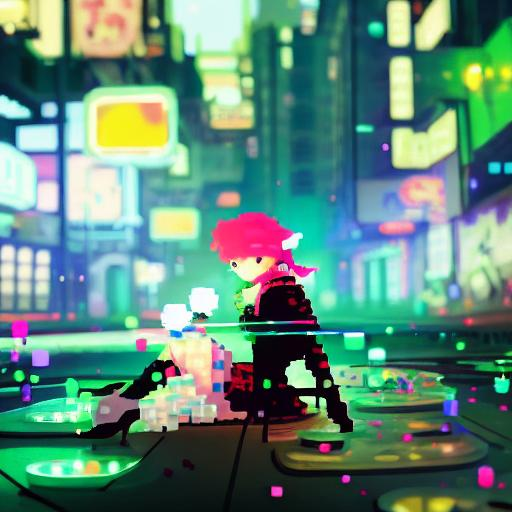

In [4]:
img = Image.open('../kcg-ml-image-pipeline/output/dataset/image/environmental/0001/000000.jpg')
img

In [5]:
image = pipeline.image_processor.preprocess(img)
latent = pipeline.vae.encode(image.half().cuda()).latent_dist.mean
latent.shape

torch.Size([1, 4, 64, 64])

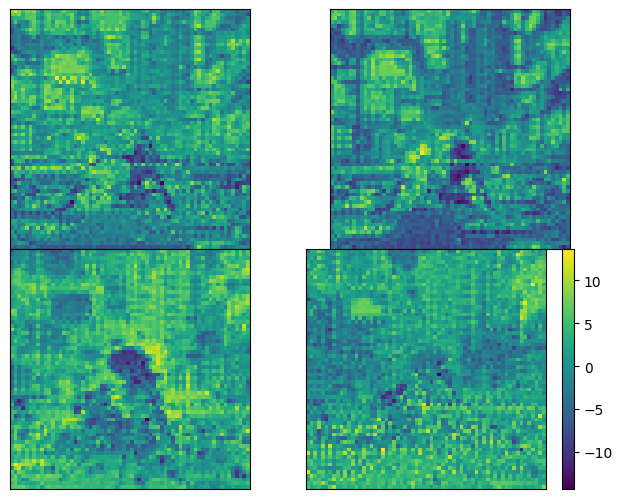

In [6]:
pyplot.subplot(2, 2, 1)

pyplot.imshow(latent[0,0].detach().cpu().numpy())
pyplot.gca().set_xticks([])
pyplot.gca().set_yticks([])

pyplot.subplot(2, 2, 2)

pyplot.imshow(latent[0,1].detach().cpu().numpy())
pyplot.gca().set_xticks([])
pyplot.gca().set_yticks([])

pyplot.subplot(2, 2, 3)

pyplot.imshow(latent[0,2].detach().cpu().numpy())
pyplot.gca().set_xticks([])
pyplot.gca().set_yticks([])

pyplot.subplot(2, 2, 4)

pyplot.imshow(latent[0,3].detach().cpu().numpy())
pyplot.gca().set_xticks([])
pyplot.gca().set_yticks([])

pyplot.subplots_adjust(left=0., right=1., bottom=0., top=1., wspace=0., hspace=0.)
pyplot.colorbar()

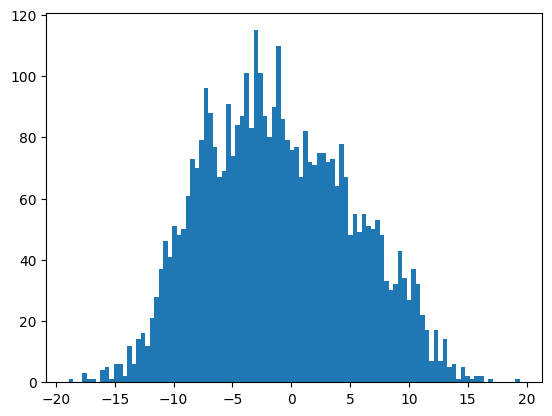

In [7]:
_ = pyplot.hist(latent[0,1].detach().cpu().numpy().reshape((-1)), bins=100)

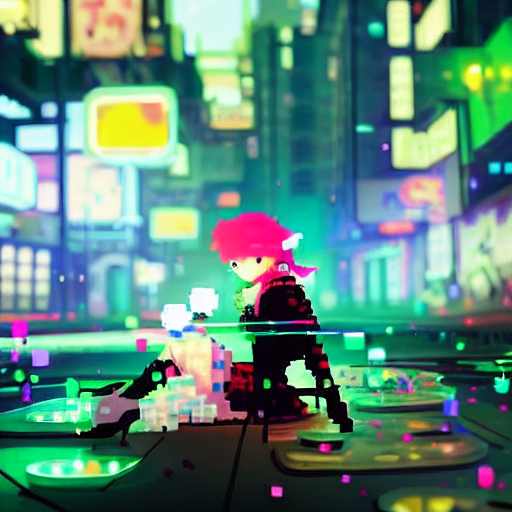

In [8]:
image = pipeline.vae.decode(latent)[0]
image = pipeline.image_processor.postprocess(image.detach(), output_type='pil', do_denormalize=[True])[0]
image

In [9]:
np.abs(np.asarray(img).astype(float) - np.asarray(image).astype(float)).mean()

5.140638987223308